In [158]:
import sys
sys.path.append('C:\\Users\\99387\\AppData\\Local\\Programs\\Python\\Python38-32\\Lib\\site-packages')
sys.path.append('C:\\Users\\79853\\AppData\\Local\\Programs\\Python\\Python38-32\\Lib\\site-packages')

In [228]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
%matplotlib inline

In [160]:
def graf_3d (p1, p2, p3, p4):

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    p = ax.scatter(p1, p2, p3, c=p4)

    ax.set_xlabel(p1.name)
    ax.set_ylabel(p2.name)
    ax.set_zlabel(p3.name)
    ax.set_title('3D mapping of objects')
    fig.colorbar(p);

In [161]:
def graf_2d (p1, p2, p3):
    df_train_orig.plot(kind='scatter', x=p1.name, y=p2.name, 
                                             c=p3.name, cmap=plt.get_cmap('jet', p3.nunique()), figsize=(12,6))
    plt.xlabel(p1.name)
    plt.ylabel(p2.name)
    plt.title('2D mapping of objects'); 

In [162]:
def apply_elbow_method(X):
    distortions = []
    K = range(2,15)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
        distortions.append(sum(np.min(cdist(X, 
                                            kmeanModel.cluster_centers_, 
                                            'euclidean'), 
                                      axis=1)) / X.shape[0])

    plt.figure(figsize=(10, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k');

In [163]:
def names():
    global S1, K1, L1, R1, F1, HF1, D1, S2, K2, L2, R2, D2, F2, HF2
    S1 = df_train['Square']
    K1 = df_train['KitchenSquare']
    L1 = df_train['LifeSquare']
    R1 = df_train['Rooms']
    D1 = df_train['DistrictId']
    F1 = df_train['Floor']
    HF1 = df_train['HouseFloor']
    S2 = df_test['Square']
    K2 = df_test['KitchenSquare']
    L2 = df_test['LifeSquare']
    R2 = df_test['Rooms']
    D2 = df_test['DistrictId']
    F2 = df_test['Floor']
    HF2 = df_test['HouseFloor']

In [164]:
DATASET_TRAIN_PATH = 'C:/Users/79853/Downloads/train.csv'
DATASET_TEST_PATH = 'C:/Users/79853/Downloads/test.csv'
#DATASET_TRAIN_PATH = 'C:/Users/99387/Downloads/train.csv'
#DATASET_TEST_PATH = 'C:/Users/99387/Downloads/test.csv'
df_train_orig = pd.read_csv(DATASET_TRAIN_PATH, index_col = 'Id')
df_test_orig = pd.read_csv(DATASET_TEST_PATH, index_col = 'Id')

In [168]:
df_train_orig.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


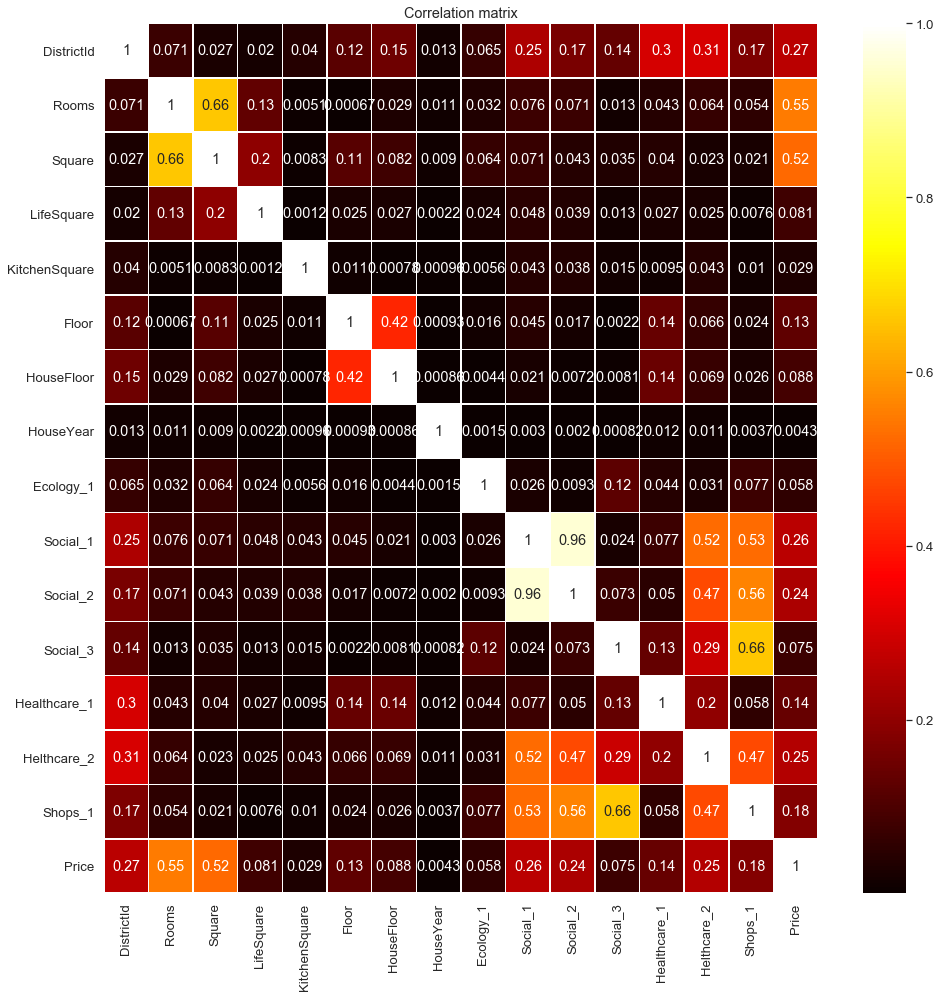

In [169]:
plt.figure(figsize = (16,16))

sns.set(font_scale=1.2)
sns.heatmap(df_train_orig.corr().abs(), 
            annot=True, linewidths=.5, cmap='hot')

plt.title('Correlation matrix');

In [170]:
sns.set()
sns.pairplot(df_train_orig)

Error in callback <function flush_figures at 0x0000017BB7B92F78> (for post_execute):


KeyboardInterrupt: 

# SQUARE + ROOMS

In [171]:
df_train = df_train_orig
df_test = df_test_orig

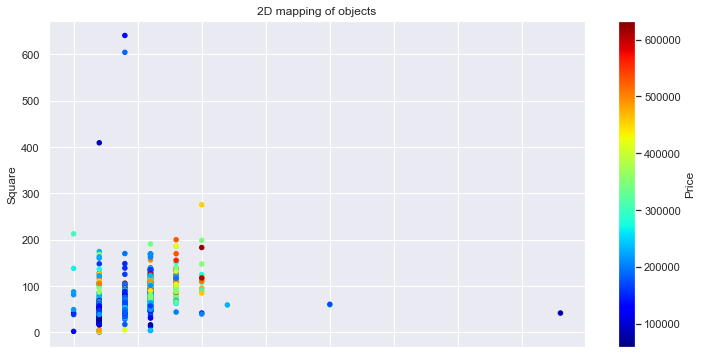

In [172]:
graf_2d(R1, S1, df_train['Price'])

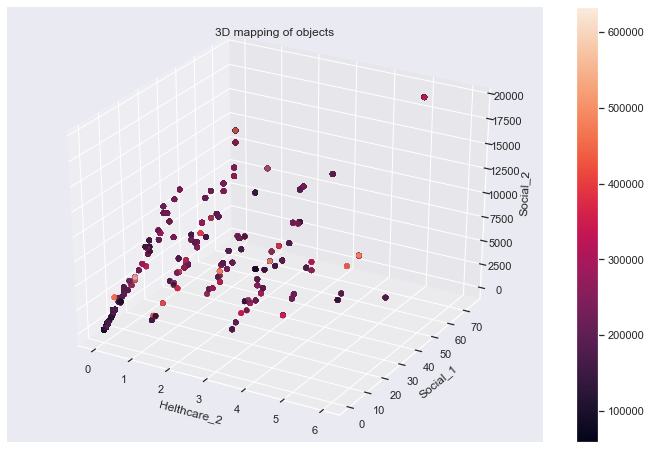

In [173]:
graf_3d(df_train['Helthcare_2'], df_train['Social_1'], df_train['Social_2'], df_train['Price'])

#### 1. добавим 2 признака: отношение площади и комнат к средним показателям по району

In [174]:
names()

df_train.insert(2, "% to average rooms per district", 
                R1/(df_train.groupby(['DistrictId'])['Rooms'].transform(lambda x: x.median()))-1, True)
df_test.insert(2, "% to average rooms per district", 
               R2/(df_test.groupby(['DistrictId'])['Rooms'].transform(lambda x: x.median()))-1, True)

df_train.insert(4, "% to average square per district", 
                S1/(df_train.groupby(['DistrictId'])['Square'].transform(lambda x: x.median()))-1, True)
df_test.insert(4, "% to average square per district", 
               S2/(df_test.groupby(['DistrictId'])['Square'].transform(lambda x: x.median()))-1, True)

In [175]:
df_train.head()

,DistrictId,Rooms,% to average rooms per district,Square,% to average square per district,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,...,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,,,
14038,35,2.0,0.0,47.981561,0.007219,29.442751,6.0,7,9.0,1969,...,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,0.5,65.683640,0.370218,40.049543,8.0,7,9.0,1978,...,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,0.0,44.947953,-0.172735,29.197612,0.0,8,12.0,1968,...,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,1.0,53.352981,0.040357,52.731512,9.0,8,17.0,1977,...,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,-0.5,39.649192,-0.125975,23.776169,7.0,11,12.0,1976,...,B,B,35,5776,1,2078.0,2,4,B,150226.531644


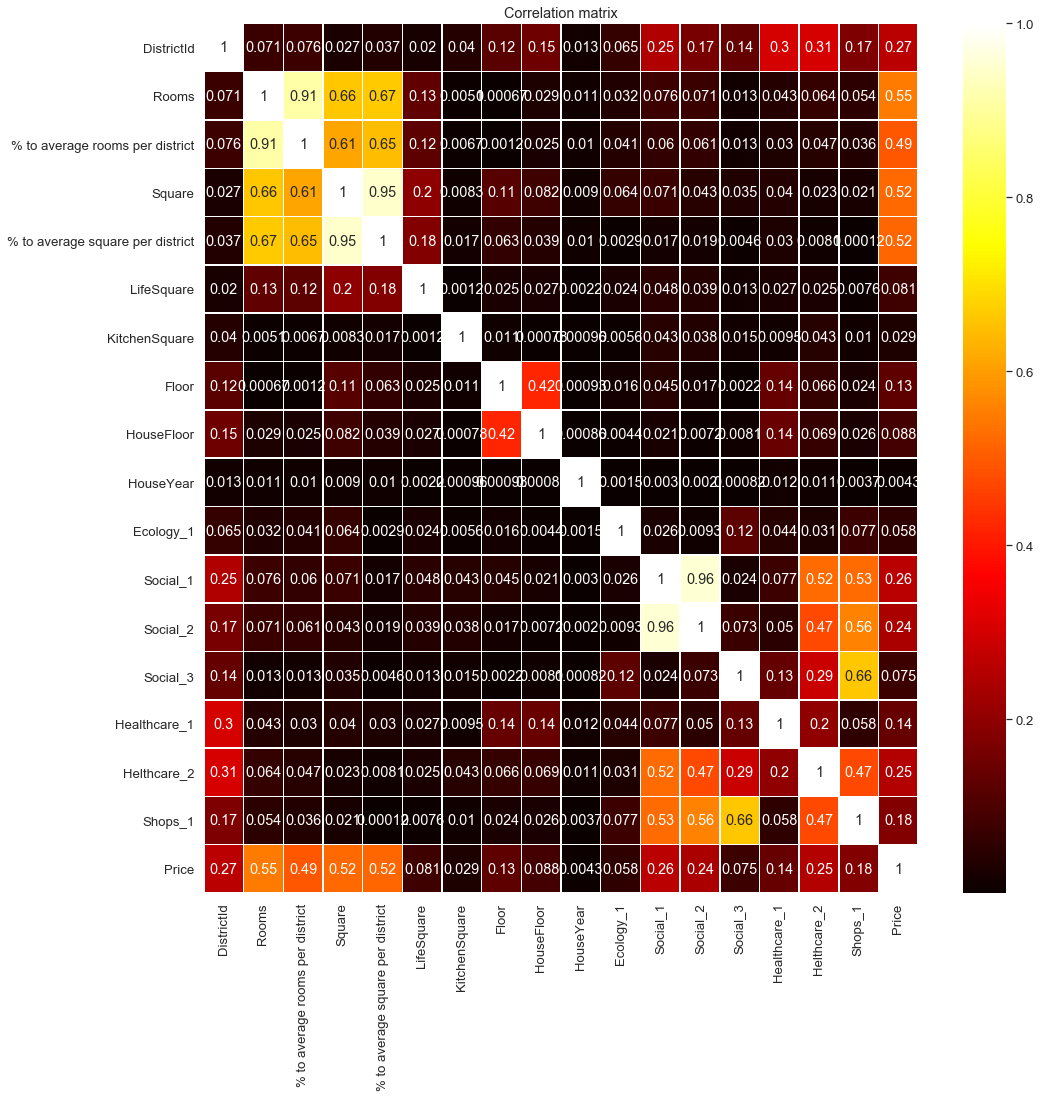

In [176]:
plt.figure(figsize = (16,16))

sns.set(font_scale=1.2)
sns.heatmap(df_train.corr().abs(), 
            annot=True, linewidths=.5, cmap='hot')

plt.title('Correlation matrix');

как и ожидалось, новые признаки хорошо коррелируются с ценой

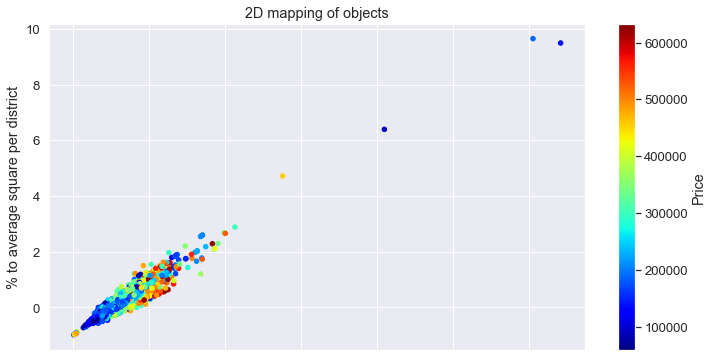

In [177]:
graf_2d(S1, df_train['% to average square per district'], df_train_orig['Price'])

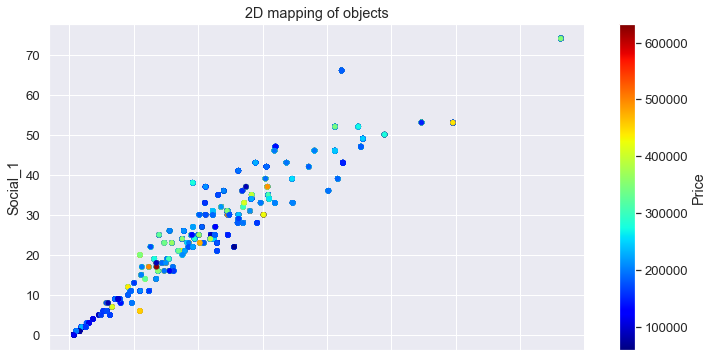

In [178]:
graf_2d(df_train['Social_2'], df_train['Social_1'], df_train_orig['Price'])

#### 2. Заменим пустые lifeSquare на среднее по группе по площади. Для начала выделим группы

In [180]:
names()
square_boarders = np.histogram_bin_edges(S1.append(S2), bins='sturges')


square_boarders = np.append(square_boarders[square_boarders<215], np.inf)
square_boarders

df_train.insert(5, "square_groups", pd.cut(S1, square_boarders, labels=["small < 44", "medium < 87", "big < 130", "big2 < 171", "huge <215", "huge2 >215"], right = False), True)
df_test.insert(5, "square_groups", pd.cut(S2, square_boarders, labels=["small < 44", "medium < 87", "big < 130", "big2 < 171", "huge <215", "huge2 >215"], right = False), True)

In [181]:
names()
df_train.loc[L1.isna(), 'LifeSquare'] = df_train.groupby(['square_groups'])['LifeSquare'].transform(lambda x: x.median())
df_test.loc[L2.isna(), 'LifeSquare'] = df_test.groupby(['square_groups'])['LifeSquare'].transform(lambda x: x.median())

#### 3. Сразу создадим dummies

In [182]:
sq_gr_dummies1 = pd.get_dummies(df_train['square_groups'], drop_first=True, prefix = 'sq_group')
sq_gr_dummies2 = pd.get_dummies(df_test['square_groups'], drop_first=True, prefix='sq_group')

df_train = pd.concat([df_train, sq_gr_dummies1], axis=1)
df_test = pd.concat([df_test, sq_gr_dummies2], axis=1)

In [183]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   DistrictId                        10000 non-null  int64   
 1   Rooms                             10000 non-null  float64 
 2   % to average rooms per district   10000 non-null  float64 
 3   Square                            10000 non-null  float64 
 4   % to average square per district  10000 non-null  float64 
 5   square_groups                     10000 non-null  category
 6   LifeSquare                        10000 non-null  float64 
 7   KitchenSquare                     10000 non-null  float64 
 8   Floor                             10000 non-null  int64   
 9   HouseFloor                        10000 non-null  float64 
 10  HouseYear                         10000 non-null  int64   
 11  Ecology_1                         10000 non-null  f

# Заменим пустые HealthCare_1 на среднее по группе по району, а оставшиеся на просто средние

In [191]:
names()
df_train.loc[df_train['Healthcare_1'].isna(), 'Healthcare_1'] = df_train.groupby(['DistrictId'])['Healthcare_1'].transform(lambda x: x.median())
df_test.loc[df_test['Healthcare_1'].isna(), 'Healthcare_1'] = df_test.groupby(['DistrictId'])['Healthcare_1'].transform(lambda x: x.median())

df_train['Healthcare_1'].fillna(df_train['Healthcare_1'].median(), inplace=True)
df_test['Healthcare_1'].fillna(df_test['Healthcare_1'].median(), inplace=True)

сохраним результат

In [197]:
df_train_clean = df_train
df_test_clean = df_test
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   DistrictId                        10000 non-null  int64   
 1   Rooms                             10000 non-null  float64 
 2   % to average rooms per district   10000 non-null  float64 
 3   Square                            10000 non-null  float64 
 4   % to average square per district  10000 non-null  float64 
 5   square_groups                     10000 non-null  category
 6   LifeSquare                        10000 non-null  float64 
 7   KitchenSquare                     10000 non-null  float64 
 8   Floor                             10000 non-null  int64   
 9   HouseFloor                        10000 non-null  float64 
 10  HouseYear                         10000 non-null  int64   
 11  Ecology_1                         10000 non-null  f

# КЛАСТЕРИЗАЦИЯ

In [200]:
scaler = StandardScaler()
X1 = df_train_clean.select_dtypes(include = ['float64', 'int64', 'uint8']).drop('Price', axis=1)
X2 = df_test_clean.select_dtypes(include = ['float64', 'int64', 'uint8'])
             
df_train_scaled = pd.DataFrame(scaler.fit_transform(X1), 
                        columns=X1.columns, 
                        index=X1.index)
df_test_scaled = pd.DataFrame(scaler.transform(X2), 
                        columns = X2.columns, 
                        index = X2.index)

In [201]:
df_train_scaled.shape, df_test_scaled.shape
df_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DistrictId                        10000 non-null  float64
 1   Rooms                             10000 non-null  float64
 2   % to average rooms per district   10000 non-null  float64
 3   Square                            10000 non-null  float64
 4   % to average square per district  10000 non-null  float64
 5   LifeSquare                        10000 non-null  float64
 6   KitchenSquare                     10000 non-null  float64
 7   Floor                             10000 non-null  float64
 8   HouseFloor                        10000 non-null  float64
 9   HouseYear                         10000 non-null  float64
 10  Ecology_1                         10000 non-null  float64
 11  Social_1                          10000 non-null  float64
 12  S

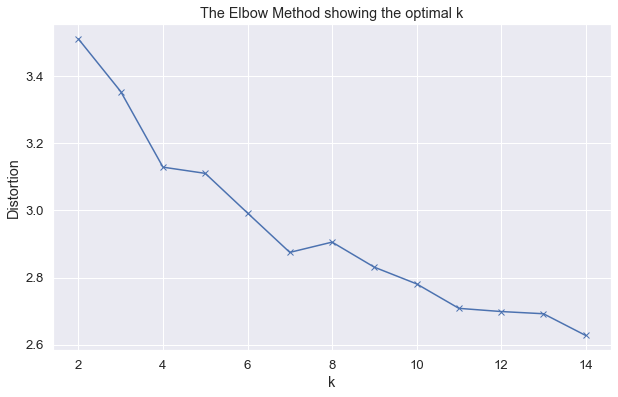

In [202]:
apply_elbow_method(pd.concat([df_train_scaled, df_test_scaled], ignore_index=True))

In [196]:
features = df_train_clean.corr()['Price'].abs()
features = features[(features.values > 0.15) & (features.values != 1)].index.tolist()
features

['DistrictId',
 'Rooms',
 '% to average rooms per district',
 'Square',
 '% to average square per district',
 'Social_1',
 'Social_2',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'sq_group_medium < 87',
 'sq_group_big < 130']

In [203]:
pca = PCA(n_components=4)
components = pca.fit_transform(df_train_scaled[features])
components_train = pd.DataFrame(data = components, 
                                      columns = ['component_1', 'component_2', 'component_3', 'component_4'],
                                      index=df_train_scaled.index)

In [209]:
df_train_pca = pd.concat([df_train_scaled, 
                   components_train, df_train['Price']], axis=1)
df_train_pca.shape, df_train_scaled.shape, components.shape

((10000, 27), (10000, 22), (5000, 4))

In [205]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            features)), '\n')

1 component: 30.17% of initial variance
0.059 x DistrictId + 0.472 x Rooms + 0.458 x % to average rooms per district + 0.460 x Square + 0.468 x % to average square per district + 0.075 x Social_1 + 0.077 x Social_2 + 0.048 x Healthcare_1 + 0.068 x Helthcare_2 + 0.071 x Shops_1 + 0.217 x sq_group_medium < 87 + 0.250 x sq_group_big < 130 

2 component: 24.84% of initial variance
0.244 x DistrictId + -0.036 x Rooms + -0.042 x % to average rooms per district + -0.123 x Square + -0.085 x % to average square per district + 0.515 x Social_1 + 0.502 x Social_2 + 0.211 x Healthcare_1 + 0.421 x Helthcare_2 + 0.412 x Shops_1 + -0.063 x sq_group_medium < 87 + -0.055 x sq_group_big < 130 

3 component: 11.41% of initial variance
0.137 x DistrictId + -0.140 x Rooms + -0.142 x % to average rooms per district + 0.121 x Square + 0.119 x % to average square per district + -0.053 x Social_1 + -0.064 x Social_2 + 0.161 x Healthcare_1 + 0.019 x Helthcare_2 + -0.021 x Shops_1 + -0.683 x sq_group_medium < 87

In [206]:
components = pca.transform(df_test_scaled[features])
components_test = pd.DataFrame(data = components, 
                                      columns = ['component_1', 'component_2', 'component_3', 'component_4'],
                                      index=df_test_scaled.index)

In [207]:
df_test_pca = pd.concat([df_test_scaled, 
                   components_test], axis=1)
df_test_pca.shape, df_test_scaled.shape

((5000, 26), (5000, 22))

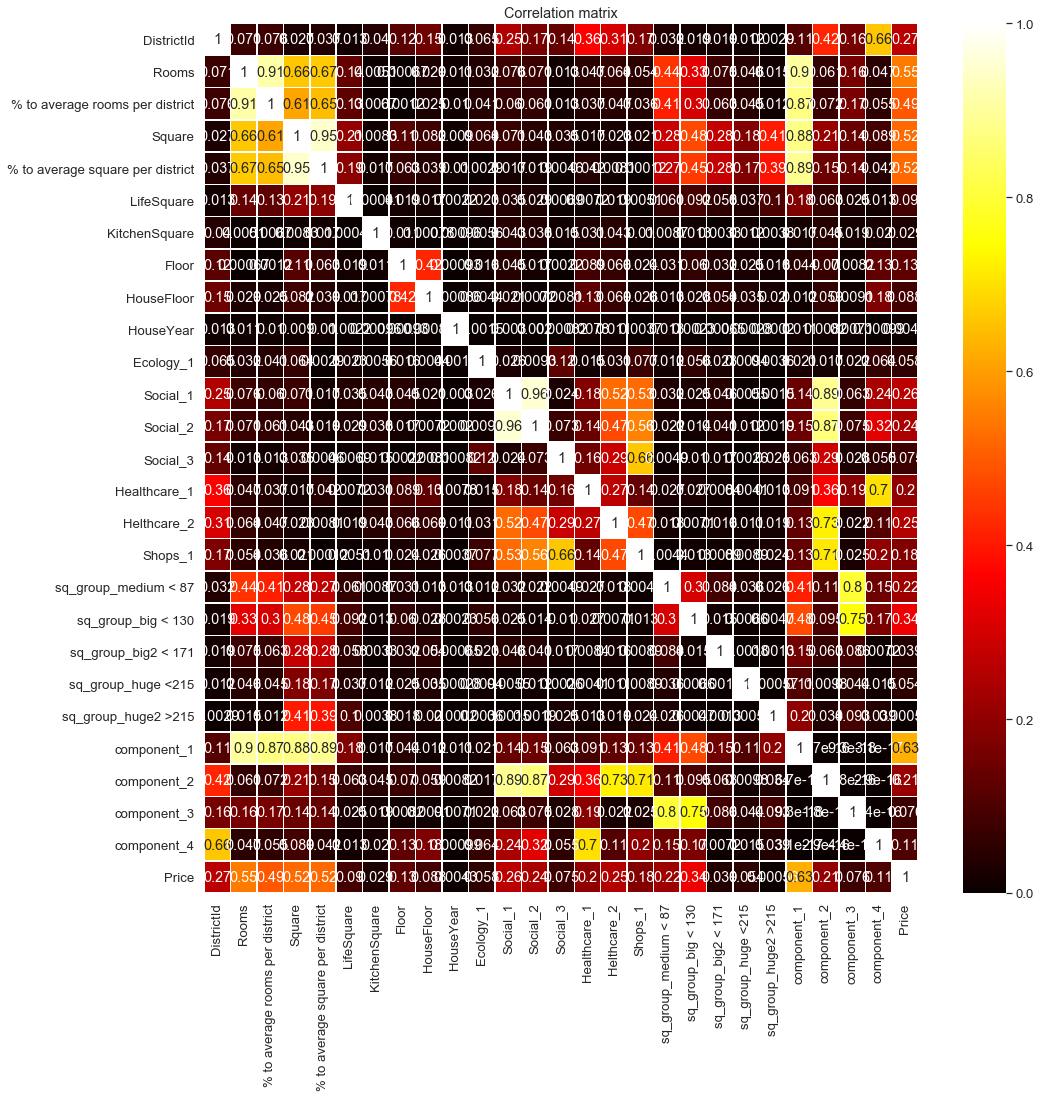

In [210]:
plt.figure(figsize = (16,16))

sns.set(font_scale=1.2)
sns.heatmap(df_train_pca.corr().abs(), 
            annot=True, linewidths=.5, cmap='hot')

plt.title('Correlation matrix');

In [211]:
df_train_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DistrictId                        10000 non-null  float64
 1   Rooms                             10000 non-null  float64
 2   % to average rooms per district   10000 non-null  float64
 3   Square                            10000 non-null  float64
 4   % to average square per district  10000 non-null  float64
 5   LifeSquare                        10000 non-null  float64
 6   KitchenSquare                     10000 non-null  float64
 7   Floor                             10000 non-null  float64
 8   HouseFloor                        10000 non-null  float64
 9   HouseYear                         10000 non-null  float64
 10  Ecology_1                         10000 non-null  float64
 11  Social_1                          10000 non-null  float64
 12  S

пробная модель

In [213]:
X = df_train_pca.drop('Price', axis = 1)
y = df_train_pca['Price']

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [246]:
gb_model = GradientBoostingRegressor(random_state=42, max_depth = 5, n_estimators = 200)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [247]:
y_train_preds = gb_model.predict(X_train)
y_test_preds = gb_model.predict(X_test)

In [248]:
R2 = r2_score(y_test, y_test_preds)
R2

0.7314029806929265

In [249]:
scores = cross_val_score(gb_model, X, y, cv=cv, scoring='r2', n_jobs=-1)
print('R2 gb_model = ', round(scores.mean(), 4))

R2 gb_model =  0.7473


In [250]:
scores

array([0.73724706, 0.73542572, 0.74901756, 0.73835088, 0.77625699])

>> вопрос 
в последней группе невероятный score = 77.6
Как понять, что там происходит, почему эта группа так отличается от остальных?

In [243]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)
params = {'n_estimators':[100, 200], 
          'max_depth':[3, 5, 7, 9]}

gs = GridSearchCV(gb_model, params, scoring='r2', 
                  cv=cv, n_jobs=-1)
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=5,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                             

In [245]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [251]:
gs.best_score_

0.7472596416338904